# reading frome file

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Dry_Bean_Dataset.xlsx'
dataset = pd.read_excel(file_path, sheet_name='Dry_Beans_Dataset')

dataset.describe()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# removing noises

In [91]:
# remove noise data
dataset = dataset.drop_duplicates()


# removing target values

In [92]:
# Drop the 'Class' column for clustering
data_values = dataset.drop(['Class'], axis=1).values
target_values = dataset['Class'].values
# mapping target values witch is an object to integer
target_values = dataset['Class'].factorize()[0]

# first population making

In [93]:
import numpy as np

# Parameters
num_clusters = 7
population_size = 50

# Randomly initialize population centroids
def initialize_population(data, num_clusters, population_size):
    n_samples, _ = data.shape
    population = []
    for _ in range(population_size):
        centroids = data[np.random.choice(n_samples, num_clusters, replace=False)]
        population.append(centroids)
    return population


# fitness

In [94]:
def fitness_function(centroids, data, truelabels):
    n_samples = data.shape[0]
    num_clusters = centroids.shape[0]
    distances = np.zeros((n_samples, num_clusters))
    for i in range(num_clusters):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    cluster_labels = np.argmin(distances, axis=1)
    fitness = 0

    # counting how much tru label and cluster label are alike
    for i in range(len(cluster_labels)):
        if truelabels[i] == cluster_labels[i]:
            fitness += 1

    return fitness


# mating pool selection

In [95]:
def select_parents(population, fitness_scores, num_parents):
    parents_indices = np.argsort(fitness_scores)[-num_parents:]
    return [population[i] for i in parents_indices]


# crossover / markdown

In [96]:
def crossover(parents, num_offspring):
    offspring = []
    for _ in range(num_offspring//2):
        parent1 = parents[np.random.choice(len(parents))]
        parent2 = parents[np.random.choice(len(parents))]
        crossover_point = np.random.randint(0, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=0)
        child2 = np.concatenate((parent1[crossover_point:], parent2[:crossover_point]), axis=0)
        offspring.append(child)
        offspring.append(child2)
    return offspring

def mutate(offspring, mutation_rate=0.01):
    for child in offspring:
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, len(child))
            child[mutation_point] += np.random.randn()
    return offspring


# implementation of GA

In [97]:
num_parents = 25
num_offspring = 25
population_size = 50



def genetic_algorithm(data, num_clusters, population_size, num_generations):
    # Initialize population
    population = initialize_population(data, num_clusters, population_size)


    
    for generation in range(num_generations):
        print(f'Generation {generation+1}/{num_generations}')
        fitness_scores = [fitness_function(chromosome, data, target_values) for chromosome in population]
        parents = select_parents(population, fitness_scores, num_parents)
        offspring = crossover(parents, num_offspring)
        offspring = mutate(offspring)
        population = parents + offspring
        print(f'Best fitness: {max(fitness_scores)}')

    # Final population evaluation
    fitness_scores = [fitness_function(chromosome, data, target_values) for chromosome in population]
    best_chromosome = population[np.argmax(fitness_scores)]
    return best_chromosome

data_values = dataset.drop(['Class'], axis=1).values
best_centroids = genetic_algorithm(data_values, num_clusters, population_size, num_generations=50)
print(best_centroids)


Generation 1/50
Best fitness: 5341
Generation 2/50
Best fitness: 5341
Generation 3/50
Best fitness: 5472
Generation 4/50
Best fitness: 5518
Generation 5/50
Best fitness: 6923
Generation 6/50
Best fitness: 6923
Generation 7/50
Best fitness: 6923
Generation 8/50
Best fitness: 6923
Generation 9/50
Best fitness: 7018
Generation 10/50
Best fitness: 7018
Generation 11/50
Best fitness: 7018
Generation 12/50
Best fitness: 7398
Generation 13/50
Best fitness: 7398
Generation 14/50
Best fitness: 7398
Generation 15/50
Best fitness: 7398
Generation 16/50
Best fitness: 7398
Generation 17/50
Best fitness: 7398
Generation 18/50
Best fitness: 7398
Generation 19/50
Best fitness: 7420
Generation 20/50
Best fitness: 7420
Generation 21/50
Best fitness: 7420
Generation 22/50
Best fitness: 7420
Generation 23/50
Best fitness: 7420
Generation 24/50
Best fitness: 7420
Generation 25/50
Best fitness: 7420
Generation 26/50
Best fitness: 7420
Generation 27/50
Best fitness: 7420
Generation 28/50
Best fitness: 7420
G

# kmaens algorithm

In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(dataset.drop(['Class'], axis=1))
kmeans_labels = kmeans.labels_


# finding best label maping and apply that to kmeans and GA solution

In [99]:
from scipy.optimize import linear_sum_assignment

def map_cluster_labels(true_labels, cluster_labels, num_clusters):
    cost_matrix = np.zeros((num_clusters, num_clusters), dtype=int)
    for i in range(num_clusters):
        for j in range(num_clusters):
            cost_matrix[i, j] = np.sum((true_labels == i) & (cluster_labels == j))
    
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return col_ind

true_labels = dataset['Class'].factorize()[0]
# Map k-means labels
kmeans_mapped_labels = map_cluster_labels(true_labels, kmeans_labels, num_clusters)
kmeans_final_labels = np.array([kmeans_mapped_labels[label] for label in kmeans_labels])

# Map GA labels
distances = np.linalg.norm(data_values[:, np.newaxis] - best_centroids, axis=2)
ga_labels = np.argmin(distances, axis=1)
ga_mapped_labels = map_cluster_labels(true_labels, ga_labels, num_clusters)
ga_final_labels = np.array([ga_mapped_labels[label] for label in ga_labels])


# having the accuracy of clustering

### theres no test or train value just we are cheking how much do we defer from true labels that where given in first data

In [100]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
kmeans_accuracy = accuracy_score(true_labels, kmeans_final_labels)
ga_accuracy = accuracy_score(true_labels, ga_final_labels)

# Calculate F1 score
kmeans_f1 = f1_score(true_labels, kmeans_final_labels, average='weighted')
ga_f1 = f1_score(true_labels, ga_final_labels, average='weighted')

print(f"K-Means Accuracy: {kmeans_accuracy}, F1 Score: {kmeans_f1}")
print(f"GA Accuracy: {ga_accuracy}, F1 Score: {ga_f1}")


K-Means Accuracy: 0.3007457727239164, F1 Score: 0.3055339073913079
GA Accuracy: 0.5478845159861183, F1 Score: 0.5277380664428878


# how much do these look different on paper??

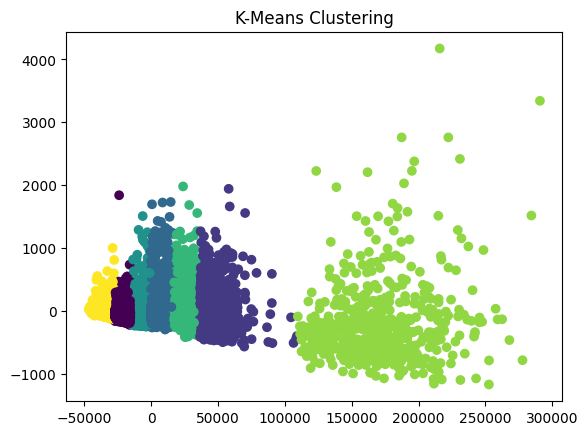

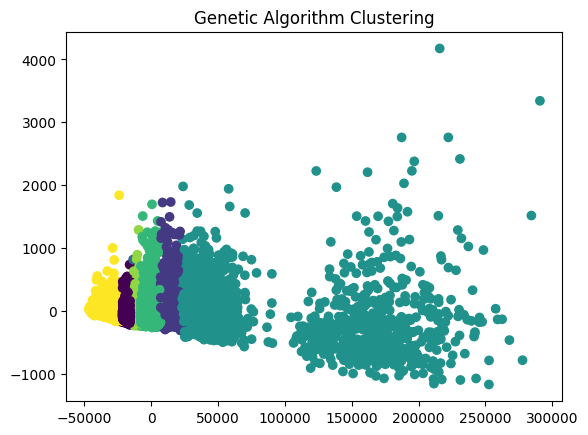

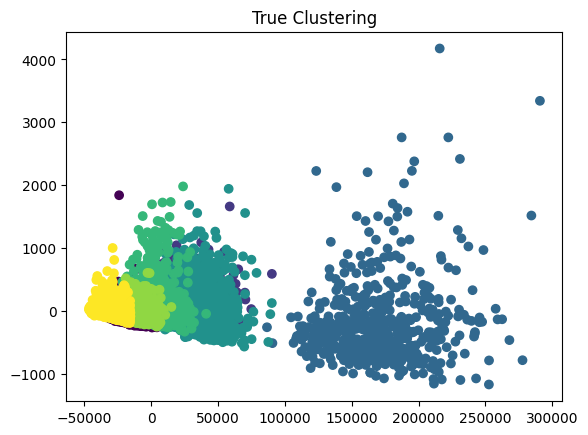

In [101]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(dataset.drop(['Class'], axis=1))

# Plot K-Means clusters
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_final_labels)
plt.title('K-Means Clustering')
plt.show()

# Plot Genetic Algorithm clusters
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=ga_final_labels)
plt.title('Genetic Algorithm Clustering')
plt.show()

# Plot true clusters
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=true_labels)
plt.title('True Clustering')
plt.show()

